In [34]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import datetime

In [3]:


# connect to the database
conn = sqlite3.connect('strava.db')
c = conn.cursor()

# create a dataframe from the activity_details table
df = pd.read_sql_query("SELECT * FROM segment_efforts", conn)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   segment_name       2086 non-null   object 
 1   segment_id         2086 non-null   int64  
 2   kom_rank           2086 non-null   int64  
 3   pr_rank            2086 non-null   int64  
 4   moving_time        2086 non-null   int64  
 5   elapsed_time       2086 non-null   int64  
 6   start_date         2086 non-null   object 
 7   start_date_local   2086 non-null   object 
 8   distance           2086 non-null   float64
 9   average_watts      2086 non-null   float64
 10  average_heartrate  2009 non-null   float64
 11  max_heartrate      2009 non-null   float64
 12  average_cadence    2086 non-null   float64
 13  segment_effort_id  2086 non-null   int64  
 14  activity_id        2086 non-null   int64  
 15  activity_type      2086 non-null   object 
dtypes: float64(5), int64(7),

In [9]:
df["start_date"] = pd.to_datetime(df.start_date)
df.drop(columns=["start_date_local", "kom_rank", "segment_effort_id"], inplace=True)

In [11]:
df.sort_values(["segment_id", "start_date"], ascending=[True, True], inplace=True)

In [19]:
df["rank_min"] = df.groupby("segment_id")["elapsed_time"].rank(method="min")

In [67]:
df["segment_count"] = df.groupby("segment_id")["segment_id"].transform("count")

In [76]:
# how many times was a segment ridden per activity
df["efforts_per_activity"] = df.groupby(["activity_id", "segment_id"])["segment_id"].transform("count")

In [46]:
cond = df["activity_type"] == "Ride"
df_ride = df[cond].copy()

In [74]:
df_ride.groupby(["activity_id", "segment_id"])["segment_id"].count().sort_values()

activity_id  segment_id
2718458700   4082037        1
5574880828   12922892       1
             12748278       1
             12734830       1
             12476764       1
                           ..
8036643169   29300100       5
8112713879   10703495       9
7378592171   9491679       10
8112713879   12028262      10
6284065809   12023291      10
Name: segment_id, Length: 1948, dtype: int64

In [75]:
df_ride[df_ride["segment_id"] == 12023291]

,segment_name,segment_id,pr_rank,moving_time,elapsed_time,start_date,distance,average_watts,average_heartrate,max_heartrate,average_cadence,activity_id,activity_type,rank_min,segment_count
473,"Milabacken, Solvarbo",12023291,2,66,68,2021-11-20 15:17:30+00:00,285.6,410.9,140.0,159.0,-1000.0,6284065809,Ride,1.0,10
474,"Milabacken, Solvarbo",12023291,-1000,85,86,2021-11-20 15:20:58+00:00,285.6,310.5,141.7,154.0,-1000.0,6284065809,Ride,5.0,10
475,"Milabacken, Solvarbo",12023291,-1000,91,91,2021-11-20 15:24:55+00:00,285.6,307.6,141.5,158.0,-1000.0,6284065809,Ride,8.0,10
476,"Milabacken, Solvarbo",12023291,-1000,87,88,2021-11-20 15:28:54+00:00,285.6,312.0,146.1,160.0,-1000.0,6284065809,Ride,6.0,10
477,"Milabacken, Solvarbo",12023291,-1000,130,130,2021-11-20 15:32:41+00:00,285.6,261.8,148.4,161.0,-1000.0,6284065809,Ride,10.0,10
478,"Milabacken, Solvarbo",12023291,-1000,82,82,2021-11-20 15:36:26+00:00,285.6,317.2,145.8,161.0,-1000.0,6284065809,Ride,3.0,10
479,"Milabacken, Solvarbo",12023291,-1000,83,83,2021-11-20 15:40:08+00:00,285.6,307.1,147.5,162.0,-1000.0,6284065809,Ride,4.0,10
480,"Milabacken, Solvarbo",12023291,-1000,102,102,2021-11-20 15:43:45+00:00,285.6,259.4,139.3,161.0,-1000.0,6284065809,Ride,9.0,10
481,"Milabacken, Solvarbo",12023291,-1000,88,88,2021-11-20 15:47:31+00:00,285.6,305.8,151.2,163.0,-1000.0,6284065809,Ride,6.0,10
482,"Milabacken, Solvarbo",12023291,3,76,76,2021-11-20 15:50:58+00:00,285.6,363.6,158.0,169.0,-1000.0,6284065809,Ride,2.0,10


In [45]:
cond = df.segment_count > 10
df[cond]

,segment_name,segment_id,pr_rank,moving_time,elapsed_time,start_date,distance,average_watts,average_heartrate,max_heartrate,average_cadence,activity_id,activity_type,rank_min,segment_count
2082,Åsbyåsen reverse,4082037,-1000,387,387,2019-09-18 04:24:23+00:00,3134.2,267.1,124.8,152.0,-1000.0,2718458700,Ride,10.0,76
2071,Åsbyåsen reverse,4082037,-1000,388,388,2019-09-19 04:46:44+00:00,3134.2,273.9,126.1,151.0,-1000.0,2721326728,Ride,12.0,76
2058,Åsbyåsen reverse,4082037,-1000,402,402,2019-09-20 04:30:24+00:00,3134.2,197.0,109.5,120.0,-1000.0,2724066647,Ride,19.0,76
2053,Åsbyåsen reverse,4082037,-1000,391,391,2019-09-24 04:32:27+00:00,3134.2,250.2,122.0,132.0,-1000.0,2735200933,Ride,13.0,76
2041,Åsbyåsen reverse,4082037,-1000,407,407,2019-09-25 04:41:28+00:00,3134.2,259.6,134.3,146.0,-1000.0,2737837179,Ride,20.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,Hällbyvägen S,29298875,1,144,144,2020-07-01 17:40:58+00:00,1254.6,174.4,147.0,151.0,-1000.0,3698950432,Ride,6.0,67
1082,Hällbyvägen S,29298875,-1000,174,174,2020-07-03 15:13:36+00:00,1254.6,176.0,119.6,129.0,-1000.0,3707770994,Ride,43.0,67
925,Hällbyvägen S,29298875,2,148,148,2021-05-18 19:05:31+00:00,1254.6,160.9,148.3,153.0,-1000.0,5319516330,Ride,10.0,67
798,Hällbyvägen S,29298875,-1000,145,145,2021-06-22 20:02:37+00:00,1254.6,324.5,143.4,148.0,-1000.0,5513080648,Ride,7.0,67


<AxesSubplot:ylabel='Frequency'>

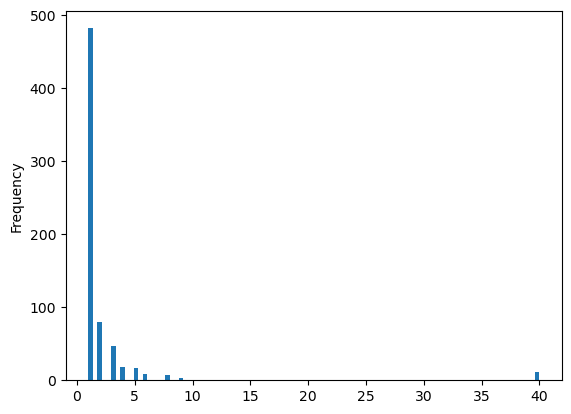

In [42]:
df.segment_id.value_counts().clip(None, 40).plot(kind="hist", bins=100)

In [30]:
df.activity_type.value_counts()

Ride           2025
Run              55
VirtualRide       6
Name: activity_type, dtype: int64

In [38]:
cond = df.segment_id == 12580876
# make a plotly scatter plot of max_heartrate and elapsed_time for the segment with id 12580876
fig = px.scatter(df[cond], x="average_heartrate", y="elapsed_time", hover_data=["start_date", "activity_type", "segment_count", "rank_min"])
fig.show()


In [37]:
cond = df.segment_id == 12580876
# make a plotly scatter plot of max_heartrate and elapsed_time for the segment with id 12580876
fig = px.scatter(df[cond], x="max_heartrate", y="elapsed_time", hover_data=["start_date", "activity_type", "segment_count", "rank_min"])
fig.show()


In [26]:
cond = df.segment_id == 12580876
df[cond].sort_values("elapsed_time")

,segment_name,segment_id,pr_rank,moving_time,elapsed_time,start_date,distance,average_watts,average_heartrate,max_heartrate,average_cadence,activity_id,activity_type,rank_min,segment_count
140,Upp till toppen av Åsbyvägen,12580876,-1000,134,134,2022-08-19 09:26:52+00:00,1163.5,468.3,160.6,170.0,-1000.0,7663443217,Ride,1.0,81
906,Upp till toppen av Åsbyvägen,12580876,-1000,135,136,2021-05-18 18:16:39+00:00,1163.5,285.5,158.6,167.0,-1000.0,5319516330,Ride,2.0,81
759,Upp till toppen av Åsbyvägen,12580876,-1000,150,150,2021-07-07 17:18:37+00:00,1163.5,395.0,144.7,151.0,-1000.0,5590919478,Ride,3.0,81
1041,Upp till toppen av Åsbyvägen,12580876,-1000,151,151,2020-07-11 18:19:01+00:00,1163.5,239.1,152.4,157.0,-1000.0,3747605453,Ride,4.0,81
652,Upp till toppen av Åsbyvägen,12580876,-1000,153,153,2021-08-12 18:32:58+00:00,1163.5,228.4,154.3,165.0,-1000.0,5782569974,Ride,5.0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,Upp till toppen av Åsbyvägen,12580876,-1000,210,210,2019-12-11 06:47:11+00:00,1163.5,222.0,115.2,123.0,-1000.0,2925495474,Ride,76.0,81
1672,Upp till toppen av Åsbyvägen,12580876,-1000,215,215,2020-01-20 05:16:53+00:00,1163.5,242.9,121.9,141.0,-1000.0,3027031887,Ride,78.0,81
1773,Upp till toppen av Åsbyvägen,12580876,-1000,229,229,2019-12-19 05:12:39+00:00,1163.5,162.7,113.4,128.0,-1000.0,2942375403,Ride,79.0,81
1487,Upp till toppen av Åsbyvägen,12580876,-1000,240,240,2020-02-27 05:24:31+00:00,1163.5,209.5,133.9,141.0,-1000.0,3135451887,Ride,80.0,81


In [12]:
df.head()

,segment_name,segment_id,kom_rank,pr_rank,moving_time,elapsed_time,start_date,distance,average_watts,average_heartrate,max_heartrate,average_cadence,segment_effort_id,activity_id,activity_type
201,Ickorrbotten HÖgbottenvÄgen 7 Climb,1457954,-1000,1,397,397,2022-07-31 09:05:09+00:00,1805.56,296.0,167.3,172.0,-1000.0,2988814592622500558,7559040923,Ride
981,Bispberg 192 Climb,1508237,-1000,-1000,846,846,2021-04-17 11:23:16+00:00,2219.16,223.1,156.7,169.0,-1000.0,2818484774334456558,5141887547,Ride
80,Bispberg 192 Climb,1508237,-1000,1,673,690,2022-09-03 12:47:11+00:00,2219.16,268.1,164.1,175.0,-1000.0,3001145677534623196,7747511091,Ride
590,Fabianbacken,1577763,-1000,2,51,51,2021-09-04 16:06:59+00:00,264.53,301.0,142.3,147.0,-1000.0,2869280838754749016,5905298943,Ride
233,HagenvÄgen 75 Climb,1654948,-1000,2,523,523,2022-07-31 12:52:50+00:00,1253.29,214.8,156.8,162.0,-1000.0,2988814592619456206,7559040923,Ride
